In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.set_option('display.max_columns', None)
import warnings
warnings.simplefilter("ignore")

In [26]:
cp_df = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv')
cp_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [28]:
cp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [29]:
obj_df = cp_df.select_dtypes(include = ['object']).copy()
obj_df.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [30]:
obj_df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [31]:
car = obj_df.CarName.str.split(expand = True) 
Brand = car[0] 
obj_df['CarBrand'] = Brand 
obj_df.drop(columns = ['CarName'],inplace = True) 
obj_df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,CarBrand
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


In [32]:
print(obj_df['doornumber'].value_counts()) 
print('\n')
print(obj_df['cylindernumber'].value_counts()) 

doornumber
four    115
two      90
Name: count, dtype: int64


cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64


In [33]:
encodedoorandcyl = {"doornumber":     {"four": 4, "two": 2},
                "cylindernumber": {"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "three": 3, "twelve":12 }}
obj_df = obj_df.replace(encodedoorandcyl) 
obj_df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,CarBrand
0,gas,std,2,convertible,rwd,front,dohc,4,mpfi,alfa-romero
1,gas,std,2,convertible,rwd,front,dohc,4,mpfi,alfa-romero
2,gas,std,2,hatchback,rwd,front,ohcv,6,mpfi,alfa-romero
3,gas,std,4,sedan,fwd,front,ohc,4,mpfi,audi
4,gas,std,4,sedan,4wd,front,ohc,5,mpfi,audi


In [34]:
one_hot = pd.get_dummies(data = obj_df, 
                         columns=['carbody','drivewheel','fueltype',
                                  'aspiration','enginelocation'
                                  ,'fuelsystem','CarBrand'])
obj_df = one_hot 
obj_df.head()

,doornumber,enginetype,cylindernumber,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,enginelocation_front,enginelocation_rear,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarBrand_Nissan,CarBrand_alfa-romero,CarBrand_audi,CarBrand_bmw,CarBrand_buick,CarBrand_chevrolet,CarBrand_dodge,CarBrand_honda,CarBrand_isuzu,CarBrand_jaguar,CarBrand_maxda,CarBrand_mazda,CarBrand_mercury,CarBrand_mitsubishi,CarBrand_nissan,CarBrand_peugeot,CarBrand_plymouth,CarBrand_porcshce,CarBrand_porsche,CarBrand_renault,CarBrand_saab,CarBrand_subaru,CarBrand_toyota,CarBrand_toyouta,CarBrand_vokswagen,CarBrand_volkswagen,CarBrand_volvo,CarBrand_vw
0,2,dohc,4,True,False,False,False,False,False,False,True,False,True,True,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,dohc,4,True,False,False,False,False,False,False,True,False,True,True,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2,ohcv,6,False,False,True,False,False,False,False,True,False,True,True,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,4,ohc,4,False,False,False,True,False,False,True,False,False,True,True,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,4,ohc,5,False,False,False,True,False,True,False,False,False,True,True,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [35]:
obj_df['enginetype'].value_counts()

enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64

In [36]:
obj_df["enginetype"] = np.where(obj_df["enginetype"].str.contains("ohc"), 1, 0) # setiap string pada data kolom engine type yang mengandung ohc menjadi 1, yang tidak menjadi 0
obj_df.head()

,doornumber,enginetype,cylindernumber,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,enginelocation_front,enginelocation_rear,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarBrand_Nissan,CarBrand_alfa-romero,CarBrand_audi,CarBrand_bmw,CarBrand_buick,CarBrand_chevrolet,CarBrand_dodge,CarBrand_honda,CarBrand_isuzu,CarBrand_jaguar,CarBrand_maxda,CarBrand_mazda,CarBrand_mercury,CarBrand_mitsubishi,CarBrand_nissan,CarBrand_peugeot,CarBrand_plymouth,CarBrand_porcshce,CarBrand_porsche,CarBrand_renault,CarBrand_saab,CarBrand_subaru,CarBrand_toyota,CarBrand_toyouta,CarBrand_vokswagen,CarBrand_volkswagen,CarBrand_volvo,CarBrand_vw
0,2,1,4,True,False,False,False,False,False,False,True,False,True,True,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,1,4,True,False,False,False,False,False,False,True,False,True,True,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2,1,6,False,False,True,False,False,False,False,True,False,True,True,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,4,1,4,False,False,False,True,False,False,True,False,False,True,True,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,4,1,5,False,False,False,True,False,True,False,False,False,True,True,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [37]:
obj_df.dtypes

doornumber              int64
enginetype              int32
cylindernumber          int64
carbody_convertible      bool
carbody_hardtop          bool
carbody_hatchback        bool
carbody_sedan            bool
carbody_wagon            bool
drivewheel_4wd           bool
drivewheel_fwd           bool
drivewheel_rwd           bool
fueltype_diesel          bool
fueltype_gas             bool
aspiration_std           bool
aspiration_turbo         bool
enginelocation_front     bool
enginelocation_rear      bool
fuelsystem_1bbl          bool
fuelsystem_2bbl          bool
fuelsystem_4bbl          bool
fuelsystem_idi           bool
fuelsystem_mfi           bool
fuelsystem_mpfi          bool
fuelsystem_spdi          bool
fuelsystem_spfi          bool
CarBrand_Nissan          bool
CarBrand_alfa-romero     bool
CarBrand_audi            bool
CarBrand_bmw             bool
CarBrand_buick           bool
CarBrand_chevrolet       bool
CarBrand_dodge           bool
CarBrand_honda           bool
CarBrand_i

In [40]:
nonobj_df = cp_df.select_dtypes(include=['int64', 'float64']).copy() # merupakan kolom awal yang sudah memiliki type int64 dan float64
df = obj_df.join(nonobj_df)

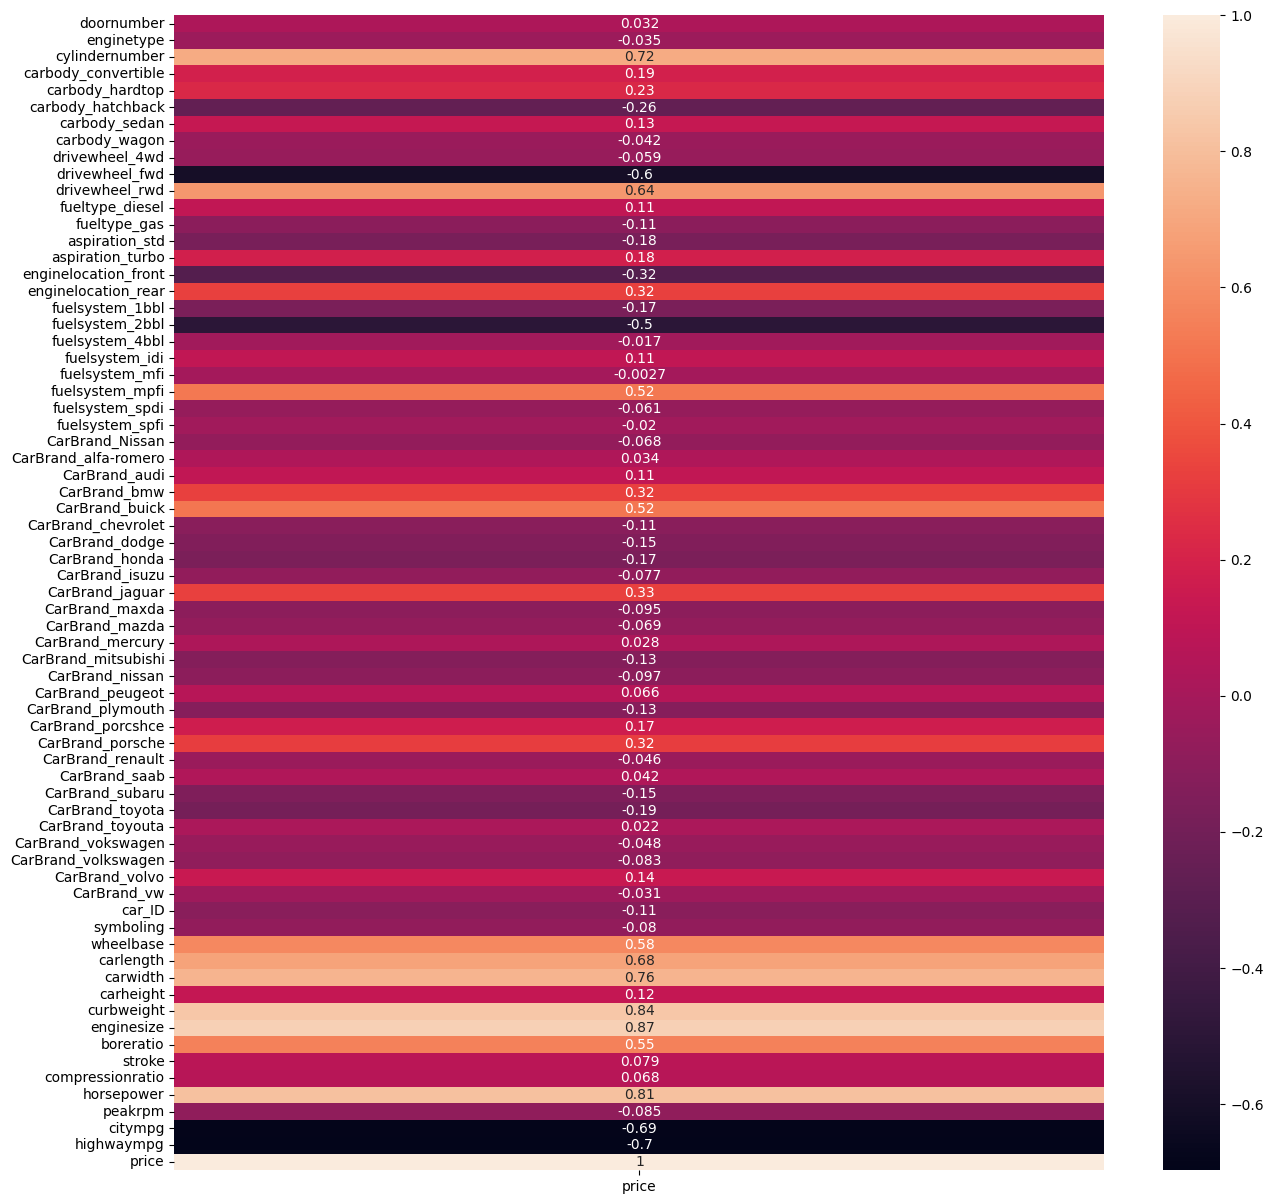

In [50]:
import seaborn as sns
plt.figure(figsize = (15,15)) 
corr = df.corr().iloc[:,-1:] 
sns.heatmap(corr, annot = True) 
plt.show() 